In [1]:
import pandas as pd
import numpy as np
import random
import sklearn.datasets as datasets
import sys

sys.path.insert(1, '..')
from check_data_consistency import DataConsistencyChecker

In [2]:
# This notebook provides examples of many of the APIs available. This includes
# some APIs that would not be necessary for most EDA or outlier detection work,
# but are useful in some situations. Many of the more common APIs are not shown
# here, as they are covered in other example notebooks. 

In [3]:
# Load a dataset. In this example, we use the Boston dataset available
# with sklearn.

data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Create a DataConsistencyChecker object

dc = DataConsistencyChecker() 

In [5]:
# Get a list of the available tests. We may wish to run just certain tests,
# or to exclude certain tests, when calling check_data_quality(), the main
# API. As well, after running check_data_quality(), we may wish to focus 
# on certain tests, for example, calling display_detailed_results(), 
# specifying some subset of these. 

dc.get_test_list()

['MISSING_VALUES',
 'RARE_VALUES',
 'UNIQUE_VALUES',
 'PREV_VALUES_DT',
 'MATCHED_MISSING',
 'UNMATCHED_MISSING',
 'SAME_VALUES',
 'SAME_OR_CONSTANT',
 'POSITIVE',
 'NEGATIVE',
 'NUMBER_DECIMALS',
 'RARE_DECIMALS',
 'COLUMN_ORDERED_ASC',
 'COLUMN_ORDERED_DESC',
 'COLUMN_TENDS_ASC',
 'COLUMN_TENDS_DESC',
 'SIMILAR_PREVIOUS',
 'UNUSUAL_ORDER_MAGNITUDE',
 'FEW_NEIGHBORS',
 'FEW_WITHIN_RANGE',
 'VERY_SMALL',
 'VERY_LARGE',
 'VERY_SMALL_ABS',
 'MULTIPLE_OF_CONSTANT',
 'ROUNDING',
 'NON_ZERO',
 'LESS_THAN_ONE',
 'GREATER_THAN_ONE',
 'INVALID_NUMBERS',
 'LARGER',
 'MUCH_LARGER',
 'SIMILAR_WRT_RATIO',
 'SIMILAR_WRT_DIFF',
 'SIMILAR_TO_INVERSE',
 'SIMILAR_TO_NEGATIVE',
 'CONSTANT_SUM',
 'CONSTANT_DIFF',
 'CONSTANT_PRODUCT',
 'CONSTANT_RATIO',
 'EVEN_MULTIPLE',
 'RARE_COMBINATION',
 'CORRELATED_FEATURES',
 'MATCHED_ZERO',
 'OPPOSITE_ZERO',
 'RUNNING_SUM',
 'A_ROUNDED_B',
 'MATCHED_ZERO_MISSING',
 'SIMILAR_TO_DIFF',
 'SIMILAR_TO_PRODUCT',
 'SIMILAR_TO_RATIO',
 'LARGER_THAN_SUM',
 'SUM_OF_COLUMNS'

In [6]:
# Calling get_test_list() provides a list of the test ids, which are used as
# parameters for some other APIs. get_test_descriptions() can provide a 
# description of what each test does. This is returned in a dictionary.
# This may be used for programmatic processing of the tests, but it not 
# intended for display. For that, use print_test_descriptions(), described 
# below.

descriptions_dict = dc.get_test_descriptions()

In [7]:
# print_test_descriptions() provides a more readable output of the available tests. 

dc.print_test_descriptions()

MISSING_VALUES:                Check if all values are consistently present / consistently missing.
RARE_VALUES:                   Check if there are any rare values.
UNIQUE_VALUES:                 Check if there are consistently unique values with each column.
PREV_VALUES_DT:                Check if the values in a column can be predicted from previous values in that column.
MATCHED_MISSING:               Check if two columns have missing values consistently in the same rows.
UNMATCHED_MISSING:             Check if two columns frequently have null values, but consistently not in the same rows.
SAME_VALUES:                   Check one column consistently has the same value as another column.
SAME_OR_CONSTANT:              Check one column consistently has either the same value as another column, or a small
                                 number of other values.
POSITIVE:                      Check if all numbers are positive.
NEGATIVE:                      Check if all numbers are neg

In [8]:
# To identify patterns and exceptions in the dataset, we create a 
# DataConsistencyChecker object (this was done above, but is repeated
# here), initialize it with the dataset we wish to check, and call 
# check_data_quality().

dc = DataConsistencyChecker()  
dc.init_data(df)
_ = dc.check_data_quality()

Executing test   0: MISSING_VALUES:               
Executing test   1: RARE_VALUES:                  
Executing test   2: UNIQUE_VALUES:                
Executing test   3: PREV_VALUES_DT:               
Executing test   4: MATCHED_MISSING:              
Executing test   5: UNMATCHED_MISSING:            
Executing test   6: SAME_VALUES:                  
Executing test   7: SAME_OR_CONSTANT:             
Executing test   8: POSITIVE:                     
Executing test   9: NEGATIVE:                     
Executing test  10: NUMBER_DECIMALS:              
Executing test  11: RARE_DECIMALS:                
Executing test  12: COLUMN_ORDERED_ASC:           
Executing test  13: COLUMN_ORDERED_DESC:          
Executing test  14: COLUMN_TENDS_ASC:             
Executing test  15: COLUMN_TENDS_DESC:            
Executing test  16: SIMILAR_PREVIOUS:             
Executing test  17: UNUSUAL_ORDER_MAGNITUDE:      
Executing test  18: FEW_NEIGHBORS:                
Executing test  19: FEW_WITHIN_

In [9]:
# The tests performed on each column are based partially on which type of 
# data the tool identified in the columns. All columns are classified as
# either string, numeric, binary, or date/time. To see how 

dc.display_columns_types_list()

**String Columns**:

None

**Numeric Columns**:

'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'

**Binary Columns**:

'CHAS'

**Date/Time Columns**:

None

In [10]:
# It is also possible to view this with example values of each column. 

dc.display_columns_types_table()


Assigned column types and example rows:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Numeric,Numeric,Numeric,Binary,Numeric,Numeric,Numeric,Numeric,Numeric,Numeric,Numeric,Numeric,Numeric
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33


....................................................................................................


### SIMILAR_PREVIOUS

### Column(s): DIS

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.


**Description**: The values in "DIS" are consistently similar to the previous value, more so than they are similar to<br>the median value of the column (3.2074499999999997), with exceptions.

**Number of exceptions**: 2 (0.3953% of rows)

**Examples of values NOT flagged (showing a consecutive set of rows)**:

,DIS
245,7.9549
246,8.0555
247,8.0555
248,7.8265
249,7.8265
250,7.3967
251,7.3967
252,8.9067
253,8.9067
254,9.2203


**Flagged values**:

,DIS
257,1.8010
356,2.1222


Showing the first flagged example with the 5 rows before and 5 rows after (if available):

,DIS
252,8.9067
253,8.9067
254,9.2203
255,9.2203
256,6.3361
257,1.8010
258,1.8946
259,2.0107
260,2.1121
261,2.1398


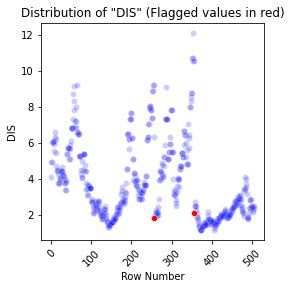

....................................................................................................


### UNUSUAL_ORDER_MAGNITUDE

### Column(s): AGE

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.


**Description**: This test checks for values of an unusual order of magnitude, etc. Each value is described in terms<br>of its order, or powers of 10. For example 10 is order 1, 100 is order 2, 1000 is order 3, etc. All<br>numbers are rounded to the nearest order of magnitude. The column contains values in the range 2.9<br>to 100.0, and consistently in the order of 1.0 or 2.0, with exceptions.

**Number of exceptions**: 1 (0.1976% of rows)

**Examples of values NOT flagged**:

,AGE,ORDER OF MAGNITUDE
15,56.5,2.0
91,73.9,2.0
98,36.9,2.0
154,96.0,2.0
160,92.6,2.0
319,58.8,2.0
341,49.3,2.0
396,96.0,2.0
400,100.0,2.0
478,96.7,2.0


**Flagged values**:

,AGE,ORDER OF MAGNITUDE
41,2.9,0.0


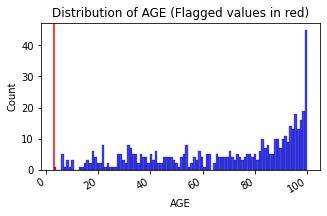

....................................................................................................


### VERY_SMALL

### Column(s): RM

**Issue ID**: 2

A strong pattern, and exceptions to the pattern, were found.


**Description**: The test marked any values less than 4.035500000000001 as very small given the 10th decile is<br>5.593500000000001 and the 90th is 7.1515. The coefficient is set at 1.0.

**Number of exceptions**: 2 (0.3953% of rows)

**Examples of values NOT flagged**:

,RM
15,5.834
90,6.417
97,8.069
153,5.709
159,6.510
318,6.382
340,5.968
397,5.747
418,5.957
478,6.185


**Flagged values**:

,RM
365,3.561
367,3.863


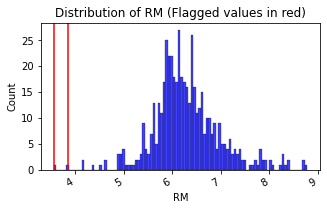

....................................................................................................


### GREATER_THAN_ONE

### Column(s): INDUS

**Issue ID**: 3

A strong pattern, and exceptions to the pattern, were found.


**Description**: The column consistently contains absolute values greater than or equal to 1.0, with exceptions.

**Number of exceptions**: 2 (0.3953% of rows)

**Examples of values NOT flagged**:

,INDUS
15,8.14
91,3.41
98,2.89
154,19.58
160,19.58
320,7.38
342,1.89
397,18.10
418,18.10
478,18.10


**Flagged values**:

,INDUS
56,0.74
195,0.46


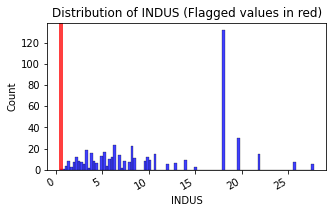

### Column(s): B

**Issue ID**: 4

A strong pattern, and exceptions to the pattern, were found.


**Description**: The column consistently contains absolute values greater than or equal to 1.0, with exceptions.

**Number of exceptions**: 1 (0.1976% of rows)

**Examples of values NOT flagged**:

,B
15,395.62
90,392.18
97,396.90
153,261.95
159,364.31
318,395.21
340,396.90
395,391.98
399,338.16
478,379.70


**Flagged values**:

,B
450,0.32


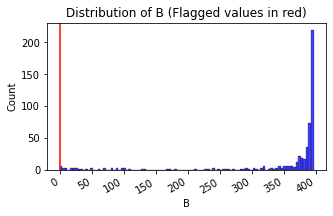

....................................................................................................


### LARGER

### Column(s): "AGE" AND "RAD"

**Issue ID**: 5

A strong pattern, and exceptions to the pattern, were found.


**Description**: "AGE" is consistently larger than "RAD".

**Number of exceptions**: 2 (0.3953% of rows)

**Examples of values NOT flagged**:

,AGE,RAD
15,56.5,4.0
91,73.9,2.0
98,36.9,2.0
154,96.0,5.0
160,92.6,5.0
320,52.3,5.0
342,59.7,1.0
397,98.9,24.0
418,100.0,24.0
478,96.7,24.0


**Flagged values**:

,AGE,RAD
41,2.9,3.0
252,6.8,7.0


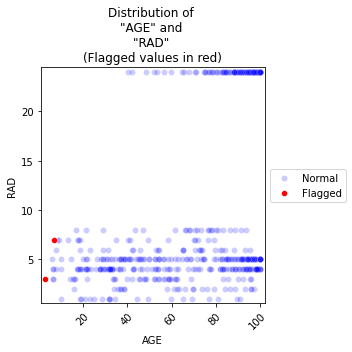

### Column(s): "B" AND "NOX"

**Issue ID**: 6

A strong pattern, and exceptions to the pattern, were found.


**Description**: "B" is consistently larger than "NOX".

**Number of exceptions**: 1 (0.1976% of rows)

**Examples of values NOT flagged**:

,B,NOX
15,395.62,0.538
90,392.18,0.489
97,396.90,0.445
153,261.95,0.871
159,364.31,0.871
318,395.21,0.544
340,396.90,0.515
395,391.98,0.693
399,338.16,0.693
478,379.70,0.614


**Flagged values**:

,B,NOX
450,0.32,0.713


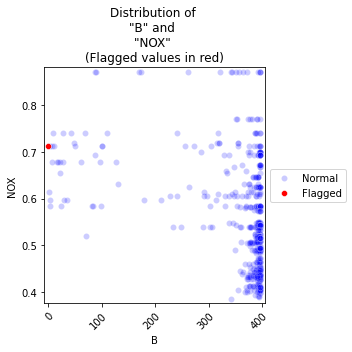

### Column(s): "B" AND "DIS"

**Issue ID**: 7

A strong pattern, and exceptions to the pattern, were found.


**Description**: "B" is consistently larger than "DIS".

**Number of exceptions**: 1 (0.1976% of rows)

**Examples of values NOT flagged**:

,B,DIS
15,395.62,4.4986
90,392.18,3.0923
97,396.90,3.4952
153,261.95,1.6232
159,364.31,1.7659
318,395.21,3.5325
340,396.90,4.8122
395,391.98,1.7257
399,338.16,1.5004
478,379.70,2.1705


**Flagged values**:

,B,DIS
450,0.32,2.3236


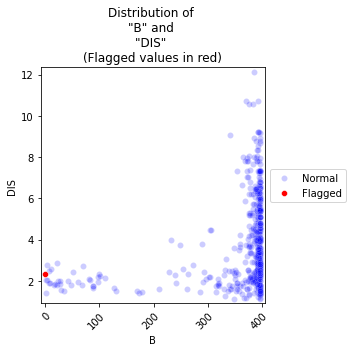

....................................................................................................


### MUCH_LARGER

### Column(s): "NOX" AND "AGE"

**Issue ID**: 8

A strong pattern, and exceptions to the pattern, were found.


**Description**: "AGE" is consistently an order of magnitude or more larger than "NOX", with exceptions (where values<br>may still be larger, but not by the normal extent).

**Number of exceptions**: 1 (0.1976% of rows)

**Examples of values NOT flagged**:

,NOX,AGE
15,0.538,56.5
91,0.489,73.9
98,0.445,36.9
154,0.871,96.0
160,0.605,92.6
319,0.544,58.8
341,0.442,49.3
396,0.693,96.0
400,0.693,100.0
478,0.614,96.7


**Flagged values**:

,NOX,AGE
41,0.448,2.9


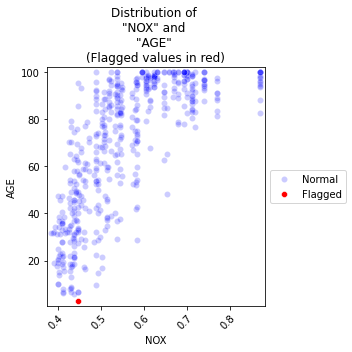

....................................................................................................


### RARE_COMBINATION

### Column(s): "INDUS" AND "B"

**Issue ID**: 9

A strong pattern, and exceptions to the pattern, were found.


**Description**: One or more rare combinations of values were found.

**Number of exceptions**: 1 (0.1976% of rows)

**Examples of values NOT flagged**:

,INDUS,B
15,8.14,395.62
90,3.41,392.18
97,2.89,396.90
154,19.58,321.02
160,19.58,338.92
319,9.90,396.23
341,1.52,394.74
396,18.10,396.90
400,18.10,396.90
478,18.10,379.70


**Flagged values**:

,INDUS,B
102,8.56,70.8


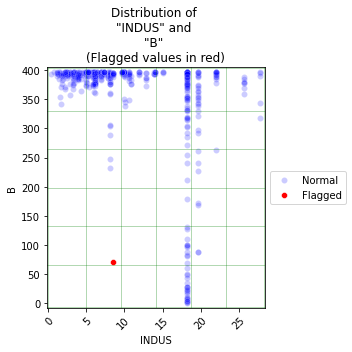

In [11]:
# Calling display_detailed_results() with default parameters will list
# all patterns and exceptions found, unless there are too many to reasonably
# display. In this case, there are too many to show at once, so we remove
# the patterns without exceptions and display only the patterns with 
# exceptions. This is still a large number, but is manageable to go through.

dc.display_detailed_results(show_patterns=False)

In [12]:
# To aid examining the results, get_test_ids_with_results() may be
# called to get a list of tests that found any patterns, with or
# without exceptions. This returns a python list, which allows
# programmatically looping through these. 

dc.get_test_ids_with_results()

['LARGER_THAN_SUM',
 'UNIQUE_VALUES_PER_ROW',
 'SIMILAR_PREVIOUS',
 'RARE_COMBINATION',
 'UNUSUAL_ORDER_MAGNITUDE',
 'GREATER_THAN_ONE',
 'LESS_THAN_ONE',
 'MISSING_VALUES',
 'MISSING_VALUES_PER_ROW',
 'LARGER',
 'VERY_SMALL',
 'NEGATIVE_VALUES_PER_ROW',
 'POSITIVE',
 'FEW_WITHIN_RANGE',
 'NON_ZERO',
 'RARE_DECIMALS',
 'NUMBER_DECIMALS',
 'MUCH_LARGER']

In [13]:
# We may wish to also look at the patterns without exceptions. By default, 
# some patterns found are not displayed in some API results, as they are 
# common and not as interesting. For example, the test NEGATIVE is, but 
# POSITIVE as not, as a column of entirely negative numbers is more 
# interesting than one of entirely POSITIVE numbers. To see which tests
# are displayed as patterns in all APIs, call get_patterns_shortlist().

dc.get_patterns_shortlist()

['UNIQUE_VALUES',
 'PREV_VALUES_DT',
 'MATCHED_MISSING',
 'UNMATCHED_MISSING',
 'SAME_VALUES',
 'SAME_OR_CONSTANT',
 'NEGATIVE',
 'RARE_DECIMALS',
 'COLUMN_ORDERED_ASC',
 'COLUMN_ORDERED_DESC',
 'COLUMN_TENDS_ASC',
 'COLUMN_TENDS_DESC',
 'SIMILAR_PREVIOUS',
 'VERY_SMALL',
 'VERY_LARGE',
 'VERY_SMALL_ABS',
 'MULTIPLE_OF_CONSTANT',
 'ROUNDING',
 'LESS_THAN_ONE',
 'SIMILAR_WRT_RATIO',
 'SIMILAR_WRT_DIFF',
 'SIMILAR_TO_INVERSE',
 'SIMILAR_TO_NEGATIVE',
 'CONSTANT_SUM',
 'CONSTANT_DIFF',
 'CONSTANT_PRODUCT',
 'CONSTANT_RATIO',
 'EVEN_MULTIPLE',
 'RARE_COMBINATION',
 'CORRELATED_FEATURES',
 'MATCHED_ZERO',
 'OPPOSITE_ZERO',
 'RUNNING_SUM',
 'A_ROUNDED_B',
 'MATCHED_ZERO_MISSING',
 'SIMILAR_TO_DIFF',
 'SIMILAR_TO_PRODUCT',
 'SIMILAR_TO_RATIO',
 'SUM_OF_COLUMNS',
 'MEAN_OF_COLUMNS',
 'MIN_OF_COLUMNS',
 'MAX_OF_COLUMNS',
 'ALL_POS_OR_ALL_NEG',
 'ALL_ZERO_OR_ALL_NON_ZERO',
 'DECISION_TREE_REGRESSOR',
 'LINEAR_REGRESSION',
 'EARLY_DATES',
 'LATE_DATES',
 'UNUSUAL_DAY_OF_WEEK',
 'UNUSUAL_DAY_OF_MO

In [14]:
# We next call get_patterns_summary() to get a list of the patterns without exceptions found.

dc.get_patterns_summary()

,Test ID,Column(s),Description of Pattern
34,RARE_DECIMALS,ZN,The column consistently contains values with o...
35,SIMILAR_PREVIOUS,TAX,"The values in ""TAX"" are consistently similar t..."
50,LESS_THAN_ONE,NOX,The column consistently contains values betwee...
72,MISSING_VALUES_PER_ROW,This test executes over all columns,The dataset consistently has 0 null values per...
73,UNIQUE_VALUES_PER_ROW,This test executes over all columns,The dataset consistently has 12 to 13 unique v...
74,NEGATIVE_VALUES_PER_ROW,This test executes over all numeric columns,The dataset consistently has 0 negative values...


In [15]:
# And we call get_exceptions_summary() to get a list of the patterns with exceptions found. 
# Here, we give an example of calling help() to explain the API. 

help(dc.get_exceptions_summary)

dc.get_exceptions_summary()

Help on method get_exceptions_summary in module check_data_consistency:

get_exceptions_summary() method of check_data_consistency.DataConsistencyChecker instance
    Returns a dataframe containing a row for each pattern that was discovered with exceptions. This has a similar
    format to the dataframe returned by get_patterns_summary, with one additional column representing the number
    of exceptions found. The dataframe has columns for: test id, the set of columns involved in the pattern,
    a description of the pattern and exceptions, and the number of exceptions.



,Test ID,Column(s),Description of Pattern,Number of Exceptions,Issue ID
0,SIMILAR_PREVIOUS,DIS,"The values in ""DIS"" are consistently similar t...",2,0
1,UNUSUAL_ORDER_MAGNITUDE,AGE,This test checks for values of an unusual orde...,1,1
2,VERY_SMALL,RM,The test marked any values less than 4.0355000...,2,2
3,GREATER_THAN_ONE,INDUS,The column consistently contains absolute valu...,2,3
4,GREATER_THAN_ONE,B,The column consistently contains absolute valu...,1,4
5,LARGER,"""AGE"" AND ""RAD""","""AGE"" is consistently larger than ""RAD"".",2,5
6,LARGER,"""B"" AND ""NOX""","""B"" is consistently larger than ""NOX"".",1,6
7,LARGER,"""B"" AND ""DIS""","""B"" is consistently larger than ""DIS"".",1,7
8,MUCH_LARGER,"""NOX"" AND ""AGE""","""AGE"" is consistently an order of magnitude or...",1,8
9,RARE_COMBINATION,"""INDUS"" AND ""B""",One or more rare combinations of values were f...,1,9


In [16]:
# To get the scores for each individual cell in the table, we can call 
# get_exceptions_by_column(). In this example, we call help() to 
# provide the docstring for the method. 

help(dc.get_exceptions_by_column)

dc.get_exceptions_by_column()

Help on method get_exceptions_by_column in module check_data_consistency:

get_exceptions_by_column() method of check_data_consistency.DataConsistencyChecker instance
    Returns a dataframe with the same shape as the original dataframe, but with each cell containing, instead
    of the original value for each feature for each row, a score allocated to that cell. Each pattern with
    exceptions has a score of 1.0, but patterns the cover multiple columns will give each cell a fraction of this.
    For example with a pattern covering 4 columns, any cells that are flagged will receive a score of 0.25 for
    this pattern. Each cell will have the sum of all patterns with exceptions where they are flagged.



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# To see the rows that were flagged the most by the process as having
# exceptions, we call display_most_flagged_rows(). This indicates both
# which rows were the most flagged, and gives some explanation for each. 

dc.display_most_flagged_rows()

**Row: 450 — Final Score: 3**

,Test ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,,6.717720,0.000000,18.100000,0.000000,0.713000,6.749000,92.600000,2.323600,24.000000,666.000000,20.200000,0.320000,17.440000
1,GREATER_THAN_ONE,,,,,,,,,,,,✔,
2,LARGER,,,,,✔,,,✔,,,,✔,


**Row: 41 — Final Score: 3**

,Test ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,,0.127440,0.000000,6.910000,0.000000,0.448000,6.770000,2.900000,5.720900,3.000000,233.000000,17.900000,385.410000,4.840000
1,UNUSUAL_ORDER_MAGNITUDE,,,,,,,✔,,,,,,
2,LARGER,,,,,,,✔,,✔,,,,
3,MUCH_LARGER,,,,,✔,,✔,,,,,,


**Row: 356 — Final Score: 1**

,Test ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,,8.982960,0.000000,18.100000,1.000000,0.770000,6.212000,97.400000,2.122200,24.000000,666.000000,20.200000,377.730000,17.600000
1,SIMILAR_PREVIOUS,,,,,,,,✔,,,,,


**Row: 365 — Final Score: 1**

,Test ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,,4.555870,0.000000,18.100000,0.000000,0.718000,3.561000,87.900000,1.613200,24.000000,666.000000,20.200000,354.700000,7.120000
1,VERY_SMALL,,,,,,✔,,,,,,,


**Row: 367 — Final Score: 1**

,Test ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,,13.522200,0.000000,18.100000,0.000000,0.631000,3.863000,100.000000,1.510600,24.000000,666.000000,20.200000,131.420000,13.330000
1,VERY_SMALL,,,,,,✔,,,,,,,


**Row: 56 — Final Score: 1**

,Test ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,,0.020550,85.000000,0.740000,0.000000,0.410000,6.383000,35.700000,9.187600,2.000000,313.000000,17.300000,396.900000,5.770000
1,GREATER_THAN_ONE,,,✔,,,,,,,,,,


**Row: 102 — Final Score: 1**

,Test ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,,0.228760,0.000000,8.560000,0.000000,0.520000,6.405000,85.400000,2.714700,5.000000,384.000000,20.900000,70.800000,10.630000
1,RARE_COMBINATION,,,✔,,,,,,,,,✔,


**Row: 257 — Final Score: 1**

,Test ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,,0.611540,20.000000,3.970000,0.000000,0.647000,8.704000,86.900000,1.801000,5.000000,264.000000,13.000000,389.700000,5.120000
1,SIMILAR_PREVIOUS,,,,,,,,✔,,,,,


**Row: 195 — Final Score: 1**

,Test ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,,0.013810,80.000000,0.460000,0.000000,0.422000,7.875000,32.000000,5.648400,4.000000,255.000000,14.400000,394.230000,2.970000
1,GREATER_THAN_ONE,,,✔,,,,,,,,,,


**Row: 252 — Final Score: 1**

,Test ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,,0.082210,22.000000,5.860000,0.000000,0.431000,6.957000,6.800000,8.906700,7.000000,330.000000,19.100000,386.090000,3.530000
1,LARGER,,,,,,,✔,,✔,,,,


In [18]:
# Display the most flagged rows without the explainations

dc.display_most_flagged_rows(with_results=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,FINAL SCORE
450,6.717720,0.000000,18.100000,0.000000,0.713000,6.749000,92.600000,2.323600,24.000000,666.000000,20.200000,0.320000,17.440000,3
41,0.127440,0.000000,6.910000,0.000000,0.448000,6.770000,2.900000,5.720900,3.000000,233.000000,17.900000,385.410000,4.840000,3
356,8.982960,0.000000,18.100000,1.000000,0.770000,6.212000,97.400000,2.122200,24.000000,666.000000,20.200000,377.730000,17.600000,1
365,4.555870,0.000000,18.100000,0.000000,0.718000,3.561000,87.900000,1.613200,24.000000,666.000000,20.200000,354.700000,7.120000,1
367,13.522200,0.000000,18.100000,0.000000,0.631000,3.863000,100.000000,1.510600,24.000000,666.000000,20.200000,131.420000,13.330000,1
56,0.020550,85.000000,0.740000,0.000000,0.410000,6.383000,35.700000,9.187600,2.000000,313.000000,17.300000,396.900000,5.770000,1
102,0.228760,0.000000,8.560000,0.000000,0.520000,6.405000,85.400000,2.714700,5.000000,384.000000,20.900000,70.800000,10.630000,1
257,0.611540,20.000000,3.970000,0.000000,0.647000,8.704000,86.900000,1.801000,5.000000,264.000000,13.000000,389.700000,5.120000,1
195,0.013810,80.000000,0.460000,0.000000,0.422000,7.875000,32.000000,5.648400,4.000000,255.000000,14.400000,394.230000,2.970000,1
252,0.082210,22.000000,5.860000,0.000000,0.431000,6.957000,6.800000,8.906700,7.000000,330.000000,19.100000,386.090000,3.530000,1


In [19]:
# To determine why a specific row was flagged, call get_results_by_row_id()
# This returns a list of the tests where exceptions were found, and the columns
# involved. 

dc.get_results_by_row_id(450)

[('GREATER_THAN_ONE', 'B'),
 ('LARGER', '"B" AND "NOX"'),
 ('LARGER', '"B" AND "DIS"')]

In [20]:
# For context, it is possible to call display_least_flagged_rows(), which provides
# som of the most inlier rows. 

dc.display_least_flagged_rows(with_results=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,FINAL SCORE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0
342,0.02498,0.0,1.89,0.0,0.518,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65,0
341,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49,0
340,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5.0,224.0,20.2,396.90,9.29,0
339,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74,0
338,0.03306,0.0,5.19,0.0,0.515,6.059,37.3,4.8122,5.0,224.0,20.2,396.14,8.51,0
337,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56,0
336,0.03427,0.0,5.19,0.0,0.515,5.869,46.3,5.2311,5.0,224.0,20.2,396.90,9.80,0
335,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,0
334,0.03738,0.0,5.19,0.0,0.515,6.310,38.5,6.4584,5.0,224.0,20.2,389.40,6.75,0


In [21]:
# Treating the tool as a standard outlier detector, we can get the outlier scores
# for each row

scores = dc.get_outlier_scores()

# Display counts of how many rows got score 0, score 1, score 2, etc.
pd.Series(scores).value_counts().sort_index()

0    496
1      8
3      2
dtype: int64

....................................................................................................


### GREATER_THAN_ONE

### Column(s): B

**Issue ID**: 4

A strong pattern, and exceptions to the pattern, were found.


**Description**: The column consistently contains absolute values greater than or equal to 1.0, with exceptions.

**Number of exceptions**: 1 (0.1976% of rows)

**Examples of values NOT flagged**:

,B
15,395.62
90,392.18
97,396.90
153,261.95
159,364.31
318,395.21
340,396.90
395,391.98
399,338.16
478,379.70


**Flagged values**:

,B
450,0.32


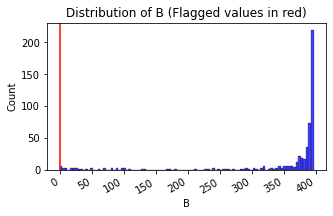

....................................................................................................


### LARGER

### Column(s): "B" AND "NOX"

**Issue ID**: 6

A strong pattern, and exceptions to the pattern, were found.


**Description**: "B" is consistently larger than "NOX".

**Number of exceptions**: 1 (0.1976% of rows)

**Examples of values NOT flagged**:

,B,NOX
15,395.62,0.538
90,392.18,0.489
97,396.90,0.445
153,261.95,0.871
159,364.31,0.871
318,395.21,0.544
340,396.90,0.515
395,391.98,0.693
399,338.16,0.693
478,379.70,0.614


**Flagged values**:

,B,NOX
450,0.32,0.713


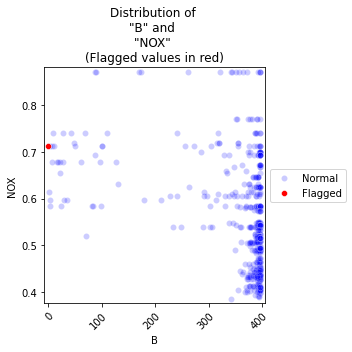

### Column(s): "B" AND "DIS"

**Issue ID**: 7

A strong pattern, and exceptions to the pattern, were found.


**Description**: "B" is consistently larger than "DIS".

**Number of exceptions**: 1 (0.1976% of rows)

**Examples of values NOT flagged**:

,B,DIS
15,395.62,4.4986
90,392.18,3.0923
97,396.90,3.4952
153,261.95,1.6232
159,364.31,1.7659
318,395.21,3.5325
340,396.90,4.8122
395,391.98,1.7257
399,338.16,1.5004
478,379.70,2.1705


**Flagged values**:

,B,DIS
450,0.32,2.3236


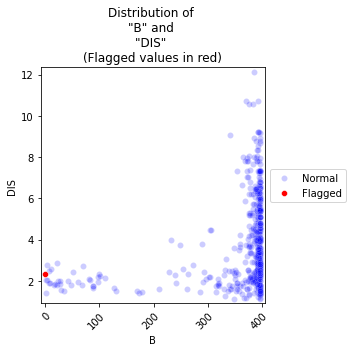

In [22]:
# Get more information about why row 450 was givens a score of 3

dc.display_detailed_results(row_id_list=[450])